In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Task 1 - a
#importing train and test data sets
trn_set=pd.read_csv('trndata.csv')
tst_set=pd.read_csv('tstdata.csv')

In [ ]:
#Task 1 - b
Class1=0;
Class2=0;
Class3=0;
for i in range(len(trn_set)):
    if trn_set['L'][i] == 1:
        Class1=Class1+1;
    elif trn_set['L'][i] == 2:
        Class2=Class2+1;
    else:
        Class3=Class3+1;
print("Number of Data points belonging to Class 1 of Training set: ", Class1)
print("Number of Data points belonging to Class 2 of Training set: ", Class2)
print("Number of Data points belonging to Class 3 of Training set: ", Class3)

Class1=0;
Class2=0;
Class3=0;
for i in range(len(tst_set)):
    if tst_set['L'][i] == 1:
        Class1=Class1+1;
    elif tst_set['L'][i] == 2:
        Class2=Class2+1;
    else:
        Class3=Class3+1;
print("Number of Data points belonging to Class 1 of Test set: ", Class1)
print("Number of Data points belonging to Class 2 of Test set: ", Class2)
print("Number of Data points belonging to Class 3 of Test set: ", Class3)

print("Number of featrues in training set: ",len(trn_set.columns)-1)
print("Number of featrues in test set: ",len(tst_set.columns)-1)

Number of Data points belonging to Class 1 of Training set:  343
Number of Data points belonging to Class 2 of Training set:  316
Number of Data points belonging to Class 3 of Training set:  341
Number of Data points belonging to Class 1 of Test set:  98
Number of Data points belonging to Class 2 of Test set:  98
Number of Data points belonging to Class 3 of Test set:  104
Number of featrues in training set:  12
Number of featrues in test set:  12


In [ ]:
#Task 1 - c
#Shuffling the traning set
Training_set_I = shuffle(trn_set,random_state = 0)
print(Training_set_I)

         F1      F2      F3      F4      F5      F6      F7      F8      F9  \
993  0.3907  0.6294  0.5879  0.7718  0.8172  0.6377  1.6973  0.0452  0.1263   
859  0.3116  0.2006  0.6378  0.1844  0.8251  0.1021  1.7316 -0.0020 -0.0054   
298 -0.0482  0.6359  0.0180  0.8810  0.2713  0.7287 -0.0079  1.7429 -0.0730   
553  0.2398  0.5381  0.4280  0.7827  0.4594  0.9249  0.4543  0.7498  0.4837   
672  0.4894  0.2322  0.9444  0.1599  1.1365  0.1100  0.9970  0.0940  1.0839   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
835  0.4713  0.4386  0.7293  0.6936  0.7792  0.8545  0.6979  0.7343  0.8918   
192  0.0429  0.7170  0.2490  0.8308  0.4208  0.7661 -0.0232  1.7629  0.0186   
629  0.9711  0.1022  1.4946  0.2016  1.7635  0.1583  1.5542  0.1290  1.8343   
559  0.4445  0.4328  0.7354  0.6306  0.7351  0.8423  0.7142  0.6597  0.8077   
684  1.0203  0.1023  1.3399  0.3863  0.8918  0.4010  1.4000  0.3113  0.9264   

        F10     F11     F12  L  
993  1.8459 -0.001

Text(0.5, 1.0, 'Scatter plot of Feature 1 against Feature 2')

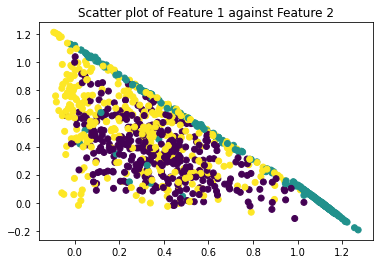

In [ ]:
#Task 1 - d
#Plotting feature 1 against feature 2 of training data set
plt.scatter(Training_set_I.F1,Training_set_I.F2,c=Training_set_I.L)
plt.title("Scatter plot of Feature 1 against Feature 2")

In [ ]:
#Task 2 - a
#PCA on Training_set_I
features = ['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12']
# Separating out the features
x = Training_set_I.loc[:, features].values
# Separating out the target
y = Training_set_I.loc[:,['L']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

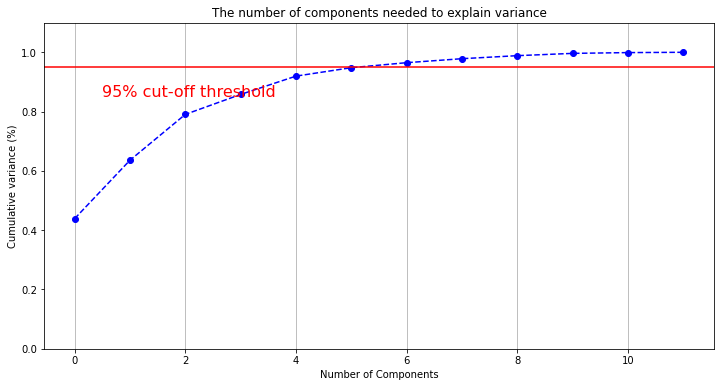

In [ ]:
#Selecting appropriate number of Principle Components by calulating cummulative sum of variance
pca = PCA().fit(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 12, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

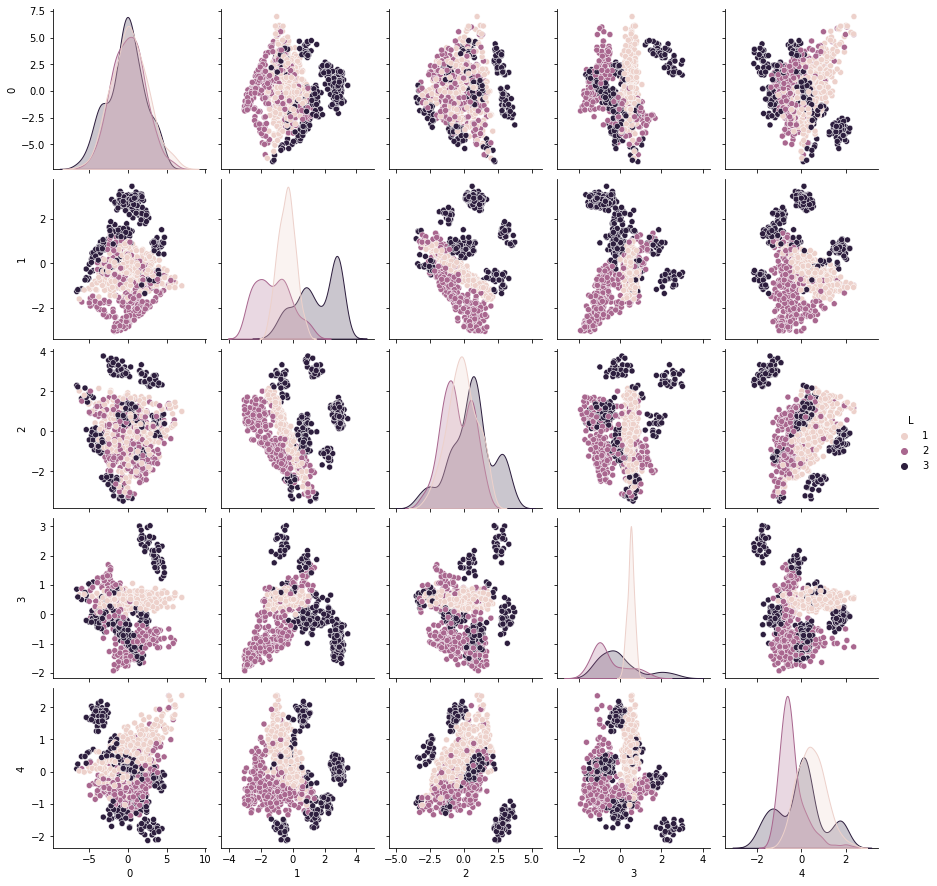

In [ ]:
#PCA for 5 components to get 95% variance
pca = PCA(n_components=5)
pca1=pca.fit_transform(x)
df = pd.DataFrame(pca1)
df = df.assign(L = y)
import seaborn as sns
sns.pairplot(df,hue="L")

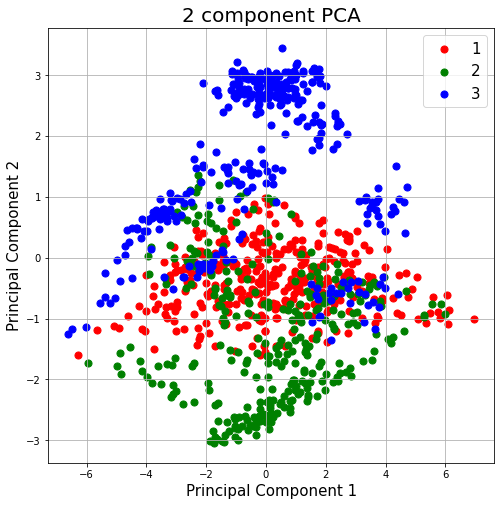

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Training_set_I['L'] == target
    ax.scatter(pca1[indicesToKeep, 0]
               , pca1[indicesToKeep, 1] , c = color
               , s = 50)
ax.legend(targets,prop={'size': 15})
ax.grid()
plt.show()

In [ ]:
#Task 2 -c
import numpy as np
print(pca.explained_variance_ratio_)

[0.43898881 0.19702233 0.15452741 0.06734698 0.06174618]


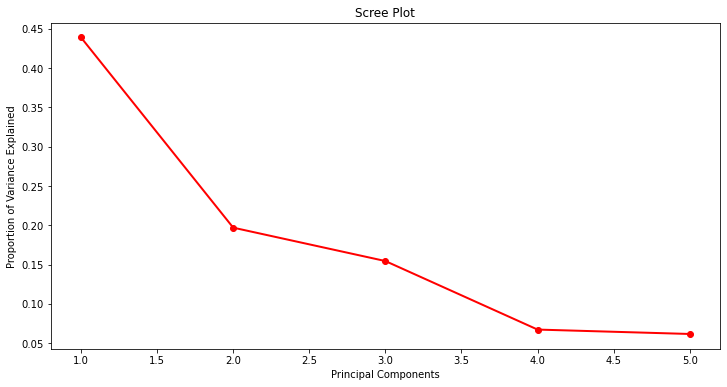

In [ ]:
#Task 2 -c scree plot
PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
#Task 2 - d
#PCA on train_set
features = ['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12']
# Separating out the features
trn_features = trn_set.loc[:, features].values
# Separating out the target
trn_target = trn_set.loc[:,['L']].values
# Standardizing the features
trn_features = StandardScaler().fit_transform(trn_features)

#PCA on tst_set
# Separating out the features
tst_features = tst_set.loc[:, features].values
# Separating out the target
tst_target = tst_set.loc[:,['L']].values
# Standardizing the features
tst_features = StandardScaler().fit_transform(tst_features)
trn_pca=pca.fit_transform(trn_features)
tst_pca=pca.fit_transform(tst_features)

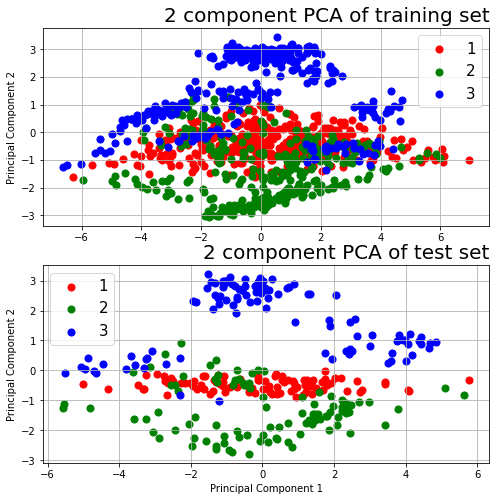

In [ ]:
fig = plt.figure(figsize = (8,8))
plt.tight_layout()
ax = fig.add_subplot(2,1,1) 
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA of training set', fontsize = 20,loc="right")
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = trn_set['L'] == target
    ax.scatter(trn_pca[indicesToKeep, 0]
               , trn_pca[indicesToKeep, 1] , c = color
               , s = 50)
ax.legend(targets,prop={'size': 15})
ax.grid()

ax1 = fig.add_subplot(2,1,2) 
ax1.set_xlabel('Principal Component 1', fontsize = 10)
ax1.set_ylabel('Principal Component 2', fontsize = 10)
ax1.set_title('2 component PCA of test set', fontsize = 20,loc="right")
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tst_set['L'] == target
    ax1.scatter(tst_pca[indicesToKeep, 0]
               , tst_pca[indicesToKeep, 1] , c = color
               , s = 50)
ax1.legend(targets,prop={'size': 15})
ax1.grid()
plt.show()

In [ ]:
#Task 3
validation_set = Training_set_I.tail(300)
Training_set_II = Training_set_I.head(len(Training_set_I)-len(validation_set))
Training_set_II

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
993,0.3907,0.6294,0.5879,0.7718,0.8172,0.6377,1.6973,0.0452,0.1263,1.8459,-0.0019,0.0013,3
859,0.3116,0.2006,0.6378,0.1844,0.8251,0.1021,1.7316,-0.0020,-0.0054,0.0055,0.0616,-0.0748,3
298,-0.0482,0.6359,0.0180,0.8810,0.2713,0.7287,-0.0079,1.7429,-0.0730,2.0824,0.0142,-0.0183,3
553,0.2398,0.5381,0.4280,0.7827,0.4594,0.9249,0.4543,0.7498,0.4837,0.9178,0.3558,0.8688,1
672,0.4894,0.2322,0.9444,0.1599,1.1365,0.1100,0.9970,0.0940,1.0839,0.1925,0.9986,0.0970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.2028,0.3866,0.2659,0.6712,0.3368,0.7250,0.3495,0.5704,0.3358,0.7372,0.2509,0.6834,1
340,-0.0397,0.8653,0.0249,1.1064,0.1539,1.0776,0.0217,1.7031,-0.0339,2.0434,0.0489,-0.0594,3
221,0.5985,0.2114,0.8599,0.2747,0.8155,0.4715,1.7543,-0.0259,-0.0189,2.0170,-0.0655,0.0796,3
928,0.5528,0.5532,0.3238,0.7494,0.2123,0.6204,0.2494,0.8322,0.2191,0.5926,0.2836,0.7916,2


In [ ]:
#Task4
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12']])
sx_tr = scaler.transform(Training_set_II[['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12']])
sx_test = scaler.transform(validation_set[['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12']])
sx_tr_df = pd.DataFrame(sx_tr,columns=['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12'])
sx_test_df = pd.DataFrame(sx_test,columns=['F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9','F10','F11','F12'])
sx_tr

array([[-0.25948749,  0.83219758,  0.12344834, ...,  1.35514141,
        -0.96591456, -1.03093149],
       [-0.46940435, -0.55668626,  0.28093281, ..., -1.18826469,
        -0.79403952, -1.17264316],
       [-1.4242474 ,  0.85325109, -1.67515678, ...,  1.68198098,
        -0.92233679, -1.06743016],
       ...,
       [ 0.29197551, -0.52170504,  0.98188069, ...,  1.59159913,
        -1.13806028, -0.88512304],
       [ 0.17069611,  0.58538566, -0.71005159, ..., -0.37690101,
        -0.19315353,  0.44074696],
       [-1.35418665,  1.48161738, -1.2273202 , ...,  1.64383818,
        -0.98838012, -1.01026133]])

In [ ]:
#training linear model with 1 feature
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1']])
sx_tr = scaler.transform(Training_set_II[['F1']])
sx_test = scaler.transform(validation_set[['F1']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1'])
sx_test = pd.DataFrame(sx_test,columns=['F1'])


LR1 = LinearRegression().fit(sx_tr[['F1']],Training_set_II['L']) #Simple Linear Regression

Tr1 = LR1.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',LR1.score(sx_tr[['F1']],Training_set_II['L']))
print('The intercept = ',LR1.intercept_)
print('The trained coeff are: ',LR1.coef_)

y_pred1=LR1.predict(sx_test[['F1']])

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred1))

print('RMSE =',mse)

Ts1 = metrics.r2_score(validation_set['L'],y_pred1)
print('score validation set: ',Ts1)

score training set:  0.008192889744041087
The intercept =  2.005714285714286
The trained coeff are:  [-0.07495141]
RMSE = 0.8225280446280062
score validation set:  0.004484425839359485


In [ ]:
#training regression model with 2 features 
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2']])
sx_tr = scaler.transform(Training_set_II[['F1','F2']])
sx_test = scaler.transform(validation_set[['F1','F2']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2'])


LR2 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr2 = LR2.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr2)
print('The intercept = ',LR2.intercept_)
print('The trained coeff are: ',LR2.coef_)

y_pred2=LR2.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred2))

print('RMSE =',mse)

Ts2 = metrics.r2_score(validation_set['L'],y_pred2)
print('score validation set: ',Ts2)

score training set:  0.049516631663644506
The intercept =  2.005714285714286
The trained coeff are:  [0.11542489 0.25412215]
RMSE = 0.7953278607627294
score validation set:  0.06923718936812906


In [ ]:
#linear regression model with 3 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3']])
sx_test = scaler.transform(validation_set[['F1','F2','F3']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3'])


LR3 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr3 = LR3.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr3)
print('The intercept = ',LR3.intercept_)
print('The trained coeff are: ',LR3.coef_)

y_pred3=LR3.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred3))

print('RMSE =',mse)

Ts3 = metrics.r2_score(validation_set['L'],y_pred3)
print('score validation set: ',Ts3)

score training set:  0.05827273549597212
The intercept =  2.005714285714286
The trained coeff are:  [0.07377699 0.27020965 0.09487431]
RMSE = 0.7914359508596157
score validation set:  0.07832421378301357


In [ ]:
#linear regression model with 4 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4'])


LR4 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr4 = LR4.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr4)
print('The intercept = ',LR4.intercept_)
print('The trained coeff are: ',LR4.coef_)

y_pred4=LR4.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred4))

print('RMSE =',mse)

Ts4 = metrics.r2_score(validation_set['L'],y_pred4)
print('score validation set: ',Ts4)

score training set:  0.08087074706012853
The intercept =  2.005714285714286
The trained coeff are:  [ 0.23326893  0.42836128 -0.00453068 -0.18909563]
RMSE = 0.7827188053183598
score validation set:  0.09851570306209467


In [ ]:
#linear regression model with 5 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5'])


LR5 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr5 = LR5.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr5)
print('The intercept = ',LR5.intercept_)
print('The trained coeff are: ',LR5.coef_)

y_pred5=LR5.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred5))

print('RMSE =',mse)

Ts5 = metrics.r2_score(validation_set['L'],y_pred5)
print('score validation set: ',Ts5)

score training set:  0.08949038241653162
The intercept =  2.005714285714286
The trained coeff are:  [ 0.30758076  0.44786141 -0.25173766 -0.19825637  0.2295277 ]
RMSE = 0.7859735955944177
score validation set:  0.09100280610415357


In [ ]:
#linear regression model with 6 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6'])


LR6 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr6 = LR6.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr6)
print('The intercept = ',LR6.intercept_)
print('The trained coeff are: ',LR6.coef_)

y_pred6=LR6.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred6))

print('RMSE =',mse)

Ts6 = metrics.r2_score(validation_set['L'],y_pred6)
print('score validation set: ',Ts6)

score training set:  0.14943512268272507
The intercept =  2.005714285714286
The trained coeff are:  [ 0.05719647  0.44373789  0.14250686  0.26290448 -0.03809727 -0.49870971]
RMSE = 0.7711357699726656
score validation set:  0.12499944712869937


In [ ]:
#linear regression model with 7 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6','F7']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6','F7']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6','F7']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7'])


LR7 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr7 = LR7.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr7)
print('The intercept = ',LR7.intercept_)
print('The trained coeff are: ',LR7.coef_)

y_pred7=LR7.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred7))

print('RMSE =',mse)

Ts7 = metrics.r2_score(validation_set['L'],y_pred7)
print('score validation set: ',Ts7)

score training set:  0.455729284868166
The intercept =  2.005714285714286
The trained coeff are:  [ 0.08102432  0.27898269 -0.05381625  0.22294987 -0.39842307 -0.36756476
  0.69566396]
RMSE = 0.5844065006109431
score validation set:  0.49745297534383726


In [ ]:
#linear regression model with 8 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6','F7','F8']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7','F8'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7','F8'])


LR8 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr8 = LR8.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr8)
print('The intercept = ',LR8.intercept_)
print('The trained coeff are: ',LR8.coef_)

y_pred8=LR8.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred8))

print('RMSE =',mse)

Ts8 = metrics.r2_score(validation_set['L'],y_pred8)
print('score validation set: ',Ts8)

score training set:  0.7681742470722077
The intercept =  2.005714285714286
The trained coeff are:  [ 0.46482684  0.43425222 -0.52737116 -0.60082127 -0.36006873 -0.20838679
  1.50044495  1.07238358]
RMSE = 0.3159336039987205
score validation set:  0.8531282487704233


In [ ]:
#linear regression model with 9 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6','F7','F8','F9']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9'])


LR9 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr9 = LR9.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr9)
print('The intercept = ',LR9.intercept_)
print('The trained coeff are: ',LR9.coef_)

y_pred9=LR9.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred9))

print('RMSE =',mse)

Ts9 = metrics.r2_score(validation_set['L'],y_pred9)
print('score validation set: ',Ts9)

score training set:  0.7682510934772542
The intercept =  2.005714285714286
The trained coeff are:  [ 0.46286268  0.4341506  -0.53112295 -0.60187203 -0.36948919 -0.21038621
  1.51027047  1.07709312  0.01202329]
RMSE = 0.3141929917199325
score validation set:  0.8547421482549712


In [ ]:
#linear regression model with 10 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'])


LR10 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr10 = LR10.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr10)
print('The intercept = ',LR10.intercept_)
print('The trained coeff are: ',LR10.coef_)

y_pred10=LR10.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred10))

print('RMSE =',mse)

Ts10 = metrics.r2_score(validation_set['L'],y_pred10)
print('score validation set: ',Ts10)

score training set:  0.7732420643196277
The intercept =  2.005714285714286
The trained coeff are:  [ 0.44173122  0.39227999 -0.50586444 -0.57795073 -0.44216521 -0.2756019
  1.46809203  1.05549458  0.10179968  0.12789441]
RMSE = 0.31254481038285853
score validation set:  0.8562621269904989


In [ ]:
#linear regression model with 11 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11'])


LR11 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr11 = LR11.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr11)
print('The intercept = ',LR11.intercept_)
print('The trained coeff are: ',LR11.coef_)

y_pred11=LR11.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred11))

print('RMSE =',mse)

Ts11 = metrics.r2_score(validation_set['L'],y_pred11)
print('score validation set: ',Ts11)

score training set:  0.8467748426136483
The intercept =  2.005714285714286
The trained coeff are:  [ 0.41640389  0.30010857  0.09214286 -0.34212863 -0.33429669 -0.25023698
  0.87538762  0.78191721 -0.05502782  0.04277461 -0.48479646]
RMSE = 0.2543531873339629
score validation set:  0.9048034963111448


In [ ]:
#linear regression model with 12 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12']])
sx_tr = scaler.transform(Training_set_II[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12']])
sx_test = scaler.transform(validation_set[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12'])


LR12 = LinearRegression().fit(sx_tr,Training_set_II['L']) #Simple Linear Regression

Tr12 = LR12.score(sx_tr,Training_set_II['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr12)
print('The intercept = ',LR12.intercept_)
print('The trained coeff are: ',LR12.coef_)

y_pred12=LR12.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(validation_set['L'],y_pred12))

print('RMSE =',mse)

Ts12 = metrics.r2_score(validation_set['L'],y_pred12)
print('score validation set: ',Ts12)

score training set:  0.8503622669234612
The intercept =  2.005714285714286
The trained coeff are:  [ 0.42150159  0.30967164  0.22013842 -0.20377255 -0.30752662 -0.22285852
  0.75171859  0.67800663 -0.09185293 -0.01343057 -0.55854702 -0.10279919]
RMSE = 0.26074019675065524
score validation set:  0.8999625512042814


In [ ]:
#Task4 - b Learning curve using the accuracy/score
tr_score = [Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7,Tr8,Tr9,Tr10,Tr11,Tr12]
#tr_score = pd.DataFrame(tr_score)
ts_score = [Ts1,Ts2,Ts3,Ts4,Ts5,Ts6,Ts7,Ts8,Ts9,Ts10,Ts11,Ts12]
#ts_score = pd.DataFrame(ts_score)
xaxis = [1,2,3,4,5,6,7,8,9,10,11,12]


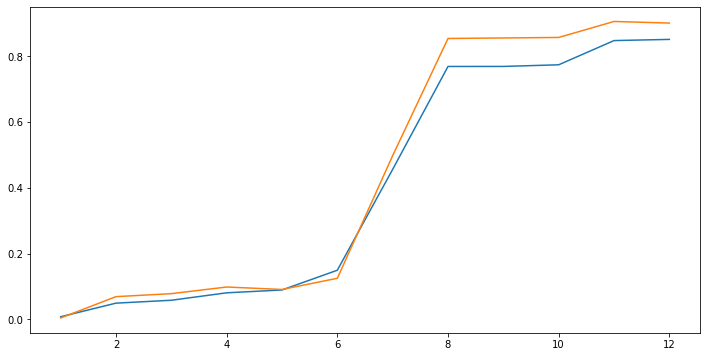

In [ ]:
plt.plot(xaxis,tr_score)
plt.plot(xaxis,ts_score)

In [ ]:
#Task 4 - d 
#linear regression model with 12 featuers
scaler = preprocessing.StandardScaler().fit(Training_set_I[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']])
sx_tr = scaler.transform(Training_set_I[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']])
sx_test = scaler.transform(tst_set[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']])
sx_tr = pd.DataFrame(sx_tr,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11'])
sx_test = pd.DataFrame(sx_test,columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11'])


LR12 = LinearRegression().fit(sx_tr,Training_set_I['L']) #Simple Linear Regression

Tr12 = LR12.score(sx_tr,Training_set_I['L']) #Score or accuracy of training model with 1 Feature

print('score training set: ',Tr12)
print('The intercept = ',LR12.intercept_)
print('The trained coeff are: ',LR12.coef_)

y_pred12=LR12.predict(sx_test)

mse = np.sqrt(metrics.mean_squared_error(tst_set['L'],y_pred12))

print('RMSE =',mse)

Ts12 = metrics.r2_score(tst_set['L'],y_pred12)
print('score validation set: ',Ts12)

score training set:  0.8654900619728724
The intercept =  1.9979999999999998
The trained coeff are:  [ 0.44387282  0.31438217  0.02902304 -0.37692805 -0.33961956 -0.23615191
  0.9562425   0.82757974 -0.03552871  0.04001542 -0.46524032]
RMSE = 0.23655301274836388
score validation set:  0.9168456590444903


In [ ]:
#Task4 - c
#I am using 11 features, because the score or the accuracy is near to 1 both in the training set and validation set

In [ ]:
#Task5
#a
#For Task1, after loading the training and testing data set, shuffling the train data set actually gives more accuarte results after performing linear ression in both train and test data set as the rows are shuffled randomly
#For task2, main aim is to find PCA, but finding minimul number of principle components actually gives a better understanding with respect to dimensionality reduction and cummulative variance.
#For task3, we can use dataframes head and tail command or traintestsplit command to split the training set further
#For task4, I could find the simple linear regression models for different feature sets but the main difficult part is to understand and produce the learning curve.
#It is found that using 11 features gives the best accuracy when comppared to other feature sets.

#b
#For Task4, this experimental design looks good but I am sure there should be another way of doing the linear regression for feature sets rather than applying
# the algorithm with each feature set for 12 time for 12 feature sets. Maybe that could be optimized to find the accuracy.